In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')


In [132]:
# view data 
print("[INFO] listing directory contects of path %s \n"%behav_data_path )
os.listdir(behav_data_path)

[INFO] listing directory contects of path drive/My Drive/Projects/16-3177_Bromo/data/clean_outputs 



['bro_screening_data.csv',
 'bro_vas_data.csv',
 'bro_survey_data_str.csv',
 'bro_taste_test_data.csv',
 'bro_survey_data_calc.csv',
 'bro_survey_data_num.csv',
 'bro_check_data_01_31_2020.csv',
 'bro_blood_data_02_06_2020_10.19.csv',
 'bro_taqstatus.csv',
 'bro_demographics.csv',
 '__pycache__',
 'widget_viewer.py',
 'data_viewer.ipynb']

In [0]:
# set data paths

# behavioral data
behav_data_path = 'drive/My Drive/Projects/16-3177_Bromo/data/clean_outputs'
taq_data_csv= behav_data_path+'/bro_taqstatus.csv'
taste_data_csv= behav_data_path+'/bro_taste_test_data.csv'
vas_data_csv= behav_data_path+'/bro_vas_data.csv'

In [0]:
# set dataframe of the taqdata
taq_df = pd.read_csv(taq_data_csv)
taste_df = pd.read_csv(taste_data_csv)
taq_df.set_index('participantID', inplace=True)
#remove startdate from file
taste_df = taste_df[taste_df.columns.drop(list(taste_df.filter(regex='StartDate')))]
taste_df.set_index('participantID', inplace=True)
#remove startdate from file
vas_df = pd.read_csv(vas_data_csv)
vas_df = vas_df[vas_df.columns.drop(list(vas_df.filter(regex='StartDate')))]
vas_df.set_index('participantID', inplace=True)


In [148]:
# view the first few contents of the dataframe 
print('[INFO] displaying initial loaded data')
display(taq_df.head())
print('\n\n[INFO] displaying initial loaded data')
display(taste_df.head())
print('\n\n[INFO] displaying initial loaded data')
display(vas_df.head())

[INFO] displaying initial loaded data


,preID,taqstatus
participantID,,
bro_001,pre_bro071,A2/A2
bro_002,pre_bro022,A1/A1
bro_003,pre_bro028,A1/A2
bro_004,pre_bro038,A1/A2
bro_005,pre_bro002,A2/A2




[INFO] displaying initial loaded data


,Duration (in seconds)_v1,Finished_v1,logo1pleasant_1_v1,logo2pleasant_1_v1,milkshakepleasant_1_v1,milkshakedesire_1_v1,milkshakesweet_1_v1,milkshakeintense_1_v1,mmpleasant_1_v1,mmdesire_1_v1,mmsweet_1_v1,mmintense_1_v1,skittpleasant_1_v1,skittdesire_1_v1,skittsweet_1_v1,skittintense_1_v1,poppleasant_1_v1,popdesire_1_v1,popsavory_1_v1,popintense_1_v1,dorpleasant_1_v1,dordesire_1_v1,dorsavory_1_v1,dorintense_1_v1,Duration (in seconds)_v2,Finished_v2,logo1pleasant_1_v2,logo2pleasant_1_v2,milkshakepleasant_1_v2,milkshakedesire_1_v2,milkshakesweet_1_v2,milkshakeintense_1_v2,mmpleasant_1_v2,mmdesire_1_v2,mmsweet_1_v2,mmintense_1_v2,skittpleasant_1_v2,skittdesire_1_v2,skittsweet_1_v2,skittintense_1_v2,poppleasant_1_v2,popdesire_1_v2,popsavory_1_v2,popintense_1_v2,dorpleasant_1_v2,dordesire_1_v2,dorsavory_1_v2,dorintense_1_v2
participantID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bro_001,1645,True,19,3,21,-46,-14,35,44.0,31.0,44.0,46.0,38.0,26.0,48.0,50.0,44.0,2.0,-38.0,33.0,60.0,66.0,-69.0,53.0,4098.0,True,41.0,-56.0,21.0,-73.0,46.0,48.0,28.0,22.0,36.0,52.0,30.0,20.0,40.0,55.0,52.0,50.0,33.0,54.0,63.0,70.0,64.0,98.0
bro_002,2327,True,-40,-61,78,35,46,52,74.0,22.0,45.0,65.0,38.0,76.0,80.0,87.0,40.0,82.0,82.0,63.0,42.0,38.0,27.0,48.0,4032.0,True,38.0,-34.0,29.0,3.0,81.0,51.0,-13.0,-40.0,43.0,37.0,38.0,39.0,41.0,68.0,41.0,42.0,42.0,32.0,18.0,17.0,43.0,48.0
bro_003,5401,True,20,20,63,78,40,66,37.0,35.0,26.0,30.0,41.0,64.0,36.0,41.0,41.0,17.0,54.0,66.0,72.0,68.0,57.0,78.0,3586.0,True,41.0,9.0,37.0,37.0,41.0,47.0,61.0,24.0,31.0,58.0,23.0,14.0,6.0,39.0,62.0,50.0,40.0,70.0,60.0,51.0,49.0,73.0
bro_004,10093,True,37,16,95,34,29,56,43.0,24.0,51.0,59.0,-25.0,-38.0,25.0,63.0,40.0,27.0,28.0,31.0,59.0,38.0,26.0,30.0,5223.0,True,-20.0,15.0,43.0,38.0,40.0,47.0,39.0,33.0,34.0,37.0,-40.0,-38.0,18.0,55.0,37.0,23.0,40.0,32.0,47.0,39.0,44.0,31.0
bro_006,3742,True,18,-13,21,-36,77,65,-13.0,-37.0,25.0,58.0,42.0,11.0,15.0,66.0,31.0,10.0,45.0,24.0,37.0,24.0,43.0,35.0,3887.0,True,-11.0,7.0,11.0,-72.0,46.0,74.0,-7.0,-62.0,26.0,33.0,20.0,-61.0,44.0,43.0,30.0,-10.0,46.0,42.0,31.0,9.0,31.0,45.0




[INFO] displaying initial loaded data


,Duration (in seconds)_v1,hungry1_1_v1,full1_1_v1,thirsty1_1_v1,nauseous1_1_v1,hungry2_1_v1,full2_1_v1,thirsty2_1_v1,nauseous2_1_v1,hungry3_1_v1,full3_1_v1,thirsty3_1_v1,nauseous3_1_v1,hungry4_1_v1,full4_1_v1,thirsty4_1_v1,nauseous4_1_v1,hungry5_1_v1,full5_1_v1,thirsty5_1_v1,nauseous5_1_v1,Duration (in seconds)_v2,hungry1_1_v2,full1_1_v2,thirsty1_1_v2,nauseous1_1_v2,hungry2_1_v2,full2_1_v2,thirsty2_1_v2,nauseous2_1_v2,hungry3_1_v2,full3_1_v2,thirsty3_1_v2,nauseous3_1_v2,hungry4_1_v2,full4_1_v2,thirsty4_1_v2,nauseous4_1_v2,hungry5_1_v2,full5_1_v2,thirsty5_1_v2,nauseous5_1_v2
participantID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bro_001,13425.0,-3.0,0.0,0.0,-100.0,11.0,0.0,0.0,0.0,-57.0,-19.0,-72.0,16.0,-82.0,72.0,-77.0,-25.0,-98.0,78.0,-84.0,-56.0,16571.0,100.0,-100.0,27.0,-45.0,62.0,-100.0,33.0,-26.0,-100.0,100.0,14.0,0.0,-61.0,80.0,-65.0,-9.0,-58.0,61.0,-72.0,-77.0
bro_002,14626.0,73.0,-100.0,-28.0,0.0,55.0,-100.0,-81.0,-78.0,-100.0,0.0,-84.0,0.0,-100.0,62.0,0.0,0.0,-100.0,79.0,-84.0,22.0,16757.0,61.0,0.0,35.0,5.0,-16.0,-67.0,-27.0,-75.0,-76.0,79.0,12.0,0.0,-68.0,5.0,0.0,0.0,-48.0,61.0,44.0,-52.0
bro_003,15389.0,9.0,-11.0,-50.0,9.0,23.0,-8.0,23.0,-56.0,51.0,-47.0,50.0,-58.0,44.0,-50.0,23.0,-75.0,3.0,-20.0,-34.0,-100.0,13812.0,63.0,-61.0,28.0,-83.0,58.0,-63.0,34.0,-85.0,40.0,-49.0,-71.0,-25.0,-59.0,48.0,-34.0,-44.0,NaN,NaN,NaN,NaN
bro_004,15690.0,2.0,0.0,38.0,7.0,27.0,16.0,26.0,-29.0,2.0,20.0,-63.0,18.0,22.0,9.0,37.0,26.0,-24.0,12.0,15.0,0.0,14306.0,43.0,-61.0,0.0,-87.0,29.0,-61.0,26.0,-15.0,-21.0,26.0,-16.0,-55.0,0.0,10.0,27.0,-47.0,52.0,0.0,34.0,-77.0
bro_005,4064.0,56.0,-63.0,-57.0,-19.0,60.0,-46.0,-71.0,-47.0,11.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# take out the 'preID' column, and set the index to the participantID 
taq_df = taq_df[['taqstatus']]


In [150]:
print('[INFO] displaying reformated data')
taq_df.head()

[INFO] displaying reformated data


,taqstatus
participantID,
bro_001,A2/A2
bro_002,A1/A1
bro_003,A1/A2
bro_004,A1/A2
bro_005,A2/A2


In [151]:
# data dimensionality
taq_df.shape

(55, 1)

In [153]:
# summary of data
taq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, bro_001 to bro_055
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   taqstatus  55 non-null     object
dtypes: object(1)
memory usage: 880.0+ bytes


In [154]:
taq_df.describe()

,taqstatus
count,55
unique,3
top,A1/A2
freq,27


In [161]:
print("[INFO] vas data quick description")
vas_df.describe()

[INFO] vas data quick description


,Duration (in seconds)_v1,hungry1_1_v1,full1_1_v1,thirsty1_1_v1,nauseous1_1_v1,hungry2_1_v1,full2_1_v1,thirsty2_1_v1,nauseous2_1_v1,hungry3_1_v1,full3_1_v1,thirsty3_1_v1,nauseous3_1_v1,hungry4_1_v1,full4_1_v1,thirsty4_1_v1,nauseous4_1_v1,hungry5_1_v1,full5_1_v1,thirsty5_1_v1,nauseous5_1_v1,Duration (in seconds)_v2,hungry1_1_v2,full1_1_v2,thirsty1_1_v2,nauseous1_1_v2,hungry2_1_v2,full2_1_v2,thirsty2_1_v2,nauseous2_1_v2,hungry3_1_v2,full3_1_v2,thirsty3_1_v2,nauseous3_1_v2,hungry4_1_v2,full4_1_v2,thirsty4_1_v2,nauseous4_1_v2,hungry5_1_v2,full5_1_v2,thirsty5_1_v2,nauseous5_1_v2
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.000000,49.00000,46.000000,46.000000,46.000000,46.000000
mean,17800.462963,27.740741,-55.833333,-15.444444,-79.148148,13.074074,-52.074074,-9.129630,-83.074074,-36.574074,10.148148,-41.222222,-32.370370,-32.905660,10.245283,-29.075472,-41.226415,-42.924528,25.905660,-31.358491,-51.830189,30112.918367,26.040816,-58.510204,2.224490,-73.795918,11.857143,-48.306122,-8.795918,-80.551020,-31.448980,14.775510,-31.448980,-42.22449,-18.448980,5.673469,-26.591837,-48.44898,-41.673913,29.869565,-32.217391,-61.652174
std,21655.915508,41.962780,37.614605,48.523741,38.084517,45.898515,35.908086,45.711584,34.054259,61.671559,49.352566,51.958135,57.952582,60.882694,47.628331,50.717486,59.667876,48.318196,42.005615,50.029643,52.522792,77872.944591,52.188344,39.574888,48.806277,42.804293,49.823020,38.895268,50.824444,34.936884,56.799377,56.742571,56.210194,56.10454,60.016686,44.544167,50.282501,55.56080,47.950926,38.192849,54.064124,44.630940
min,1007.000000,-85.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-87.000000,-100.000000,-100.000000,-100.000000,-99.000000,-100.000000,-100.000000,5731.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.00000,-100.000000,-81.000000,-100.000000,-100.00000,-100.000000,-66.000000,-100.000000,-100.000000
25%,14528.500000,3.750000,-88.500000,-53.750000,-100.000000,-4.000000,-84.750000,-41.250000,-100.000000,-94.000000,-28.000000,-83.750000,-89.500000,-84.000000,-25.000000,-79.000000,-100.000000,-80.000000,0.000000,-84.000000,-100.000000,14764.000000,12.000000,-100.000000,-16.000000,-100.000000,-19.000000,-79.000000,-36.000000,-100.000000,-78.000000,-34.000000,-96.000000,-98.00000,-76.000000,-26.000000,-73.000000,-100.00000,-78.500000,0.000000,-87.750000,-100.000000
50%,15363.500000,38.000000,-59.500000,-1.000000,-100.000000,23.000000,-52.000000,3.500000,-100.000000,-62.000000,20.000000,-60.000000,-50.000000,-52.000000,9.000000,-28.000000,-68.000000,-47.000000,29.000000,-34.000000,-82.000000,15536.000000,44.000000,-61.000000,16.000000,-100.000000,27.000000,-52.000000,8.000000,-100.000000,-46.000000,30.000000,-28.000000,-61.00000,-15.000000,5.000000,-22.000000,-72.00000,-53.500000,32.000000,-39.500000,-78.000000
75%,16028.750000,53.750000,-24.750000,26.000000,-81.000000,48.500000,-20.250000,22.750000,-84.250000,17.000000,43.500000,0.000000,20.500000,19.000000,47.000000,19.000000,17.000000,-2.000000,57.000000,13.000000,0.000000,16347.000000,59.000000,-37.000000,32.000000,-78.000000,49.000000,-23.000000,29.000000,-81.000000,22.000000,49.000000,14.000000,7.00000,32.000000,33.000000,19.000000,0.00000,-5.250000,57.000000,19.500000,-31.000000
max,172536.000000,94.000000,35.000000,59.000000,19.000000,88.000000,35.000000,72.000000,54.000000,86.000000,100.000000,85.000000,84.000000,87.000000,100.000000,54.000000,73.000000,50.000000,100.000000,52.000000,40.000000,521776.000000,100.000000,55.000000,

In [162]:
print("[INFO] taste data quick description")
taste_df.describe()

[INFO] taste data quick description


,Duration (in seconds)_v1,logo1pleasant_1_v1,logo2pleasant_1_v1,milkshakepleasant_1_v1,milkshakedesire_1_v1,milkshakesweet_1_v1,milkshakeintense_1_v1,mmpleasant_1_v1,mmdesire_1_v1,mmsweet_1_v1,mmintense_1_v1,skittpleasant_1_v1,skittdesire_1_v1,skittsweet_1_v1,skittintense_1_v1,poppleasant_1_v1,popdesire_1_v1,popsavory_1_v1,popintense_1_v1,dorpleasant_1_v1,dordesire_1_v1,dorsavory_1_v1,dorintense_1_v1,Duration (in seconds)_v2,logo1pleasant_1_v2,logo2pleasant_1_v2,milkshakepleasant_1_v2,milkshakedesire_1_v2,milkshakesweet_1_v2,milkshakeintense_1_v2,mmpleasant_1_v2,mmdesire_1_v2,mmsweet_1_v2,mmintense_1_v2,skittpleasant_1_v2,skittdesire_1_v2,skittsweet_1_v2,skittintense_1_v2,poppleasant_1_v2,popdesire_1_v2,popsavory_1_v2,popintense_1_v2,dorpleasant_1_v2,dordesire_1_v2,dorsavory_1_v2,dorintense_1_v2
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,9893.407407,14.759259,1.111111,26.870370,-1.092593,45.074074,51.240741,21.339623,-13.415094,44.735849,47.188679,31.924528,7.773585,46.509434,55.849057,41.660377,29.943396,39.188679,46.981132,44.849057,39.716981,45.792453,57.924528,10391.437500,8.270833,1.06250,18.500000,-11.375000,42.250000,52.354167,12.895833,-21.875000,42.041667,47.479167,23.957447,0.787234,43.170213,54.680851,35.893617,22.148936,39.936170,44.000000,38.319149,30.170213,45.680851,53.446809
std,14147.432427,25.238437,27.664886,30.528086,39.839427,23.019149,15.564758,23.109225,32.462661,23.852230,13.289754,26.369307,39.030876,26.531275,15.420262,21.865800,29.239998,21.462899,14.923511,21.394101,35.438124,32.214640,18.221763,14832.659762,37.284838,38.29305,30.358146,39.245341,29.473031,18.970851,33.176023,36.966129,30.994137,17.347499,26.582895,38.673627,28.091712,14.673410,29.765193,33.903943,27.221638,14.963724,21.024940,26.999452,22.360783,19.433061
min,176.000000,-40.000000,-65.000000,-68.000000,-100.000000,-14.000000,28.000000,-29.000000,-81.000000,-23.000000,28.000000,-64.000000,-100.000000,3.000000,19.000000,-26.000000,-45.000000,-38.000000,19.000000,-22.000000,-61.000000,-69.000000,26.000000,1275.000000,-100.000000,-99.00000,-100.000000,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,-100.000000,0.000000,-63.000000,-100.000000,-40.000000,27.000000,-100.000000,-100.000000,-96.000000,0.000000,-14.000000,-21.000000,-1.000000,0.000000
25%,4343.500000,-6.250000,-16.750000,20.000000,-36.000000,33.000000,39.250000,14.000000,-38.000000,36.000000,33.000000,21.000000,-20.000000,25.000000,46.000000,27.000000,15.000000,37.000000,36.000000,30.000000,21.000000,29.000000,46.000000,4676.750000,-17.250000,-17.50000,14.000000,-37.250000,32.000000,41.500000,4.000000,-40.250000,31.750000,37.000000,16.500000,-32.500000,29.000000,43.500000,26.500000,15.000000,30.000000,32.000000,23.000000,16.000000,34.000000,44.000000
50%,5631.000000,18.500000,3.000000,30.000000,13.000000,41.500000,49.500000,21.000000,-20.000000,42.000000,48.000000,38.000000,14.000000,43.000000,58.000000,40.000000,35.000000,42.000000,46.000000,42.000000,38.000000,44.000000,56.000000,5504.500000,19.500000,5.00000,22.000000,-1.000000,43.000000,50.000000,19.000000,-21.500000,44.500000,46.500000,27.000000,10.000000,41.000000,55.000000,38.000000,34.000000,42.000000,46.000000,40.000000,33.000000,42.000000,49.000000
75%,13831.250000,36.000000,19.000000,42.750000,28.000000,63.000000,63.000000,38.000000,15.000000,56.000000,58.000000,44.000000,34.000000,67.000000,66.000000,59.000000,44.000000,45.000000,56.000000,60.000000,64.000000,69.000000,66.000000,14300.250000,38.000000,22.25000,37.000000,19.750000,57.250000,66.250000,32.250000,1.000000,57.250000,57.2500

No handles with labels found to put in legend.


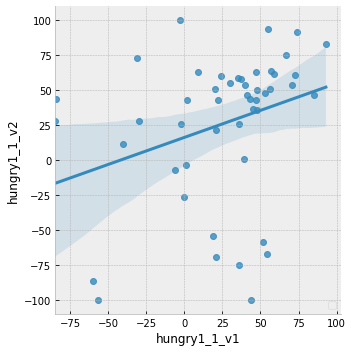

In [174]:
#vas_df.hist()
#vas_df.columns.values
#vas_df.filter(regex='full').hist()
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="hungry1_1_v1", y="hungry1_1_v2", data=vas_df)#, fit_reg=False,  legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()



In [121]:
# generate binary values using get_dummies
# we do this for analyis input 
print("[INFO] generating dummy variables...")
dum_df = pd.get_dummies(taq_df, columns=["taqstatus"], prefix=["Type_is"] )
# merge with main df bridge_df on key values
taq_df = taq_df.join(dum_df)
taq_df.head(10)




[INFO] generating dummy variables...


,taqstatus,Type_is_A1/A1,Type_is_A1/A2,Type_is_A2/A2
participantID,,,,
bro_001,A2/A2,0,0,1
bro_002,A1/A1,1,0,0
bro_003,A1/A2,0,1,0
bro_004,A1/A2,0,1,0
bro_005,A2/A2,0,0,1
bro_006,A1/A2,0,1,0
bro_007,A2/A2,0,0,1
bro_008,A2/A2,0,0,1
bro_009,A1/A2,0,1,0


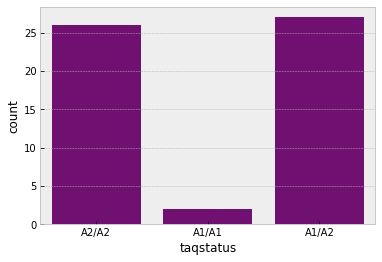

In [130]:
sns.countplot(taq_df['taqstatus'], color='purple')
